In [1]:
from faker import Faker
import random
import pandas as pd
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from datetime import datetime
import pymysql
from sqlalchemy import create_engine
from operator import itemgetter
import openpyxl
import matplotlib.pyplot as plt 
import seaborn as sns

# Initialize Faker
fake = Faker()

# Categories, payment modes, and descriptions
Category = ["Stationaries", "Bills", "Groceries", "Subscriptions"]
Payment_Mode = ["Cash", "Credit card", "Debit card", "Net banking", "UPI"]
Name = ["Arun", "Balu", "Cynthia", "Devi"]
descriptions = {
    "Stationaries": ["Notes", "Papers", "pencil", "marker"],
    "Subscriptions": ["Youtube", "Amazon", "Netflix", "Hotstar"],
    "Bills": ["Water bill", "Electricity bill", "Telephone bill", "Mobile bill"],
    "Groceries": ["Vegetables", "Fruits", "Milk", "Dairy products"],
}

# Generate random expense data
def gen_exp_data(num, start_date, end_date):
    data = []
    for _ in range(num):
        category = random.choice(Category)
        expense = {
            "Date": fake.date_between_dates(date_start=start_date, date_end=end_date),
            "Name": random.choice(Name),
            "Category": category,
            "Payment_Mode": random.choice(Payment_Mode),
            "Descriptions": random.choice(descriptions[category]),
            "Amount": round(random.uniform(10, 1000), 2),
        }
        data.append(expense)
    return pd.DataFrame(data)

# Months for generating data
months = [
    ("Jan", datetime(2024, 1, 1), datetime(2024, 1, 31)),
    ("Feb", datetime(2024, 2, 1), datetime(2024, 2, 29)),
    ("Mar", datetime(2024, 3, 1), datetime(2024, 3, 31)),
    ("Apr", datetime(2024, 4, 1), datetime(2024, 4, 30)),
    ("May", datetime(2024, 5, 1), datetime(2024, 5, 31)),
    ("Jun", datetime(2024, 6, 1), datetime(2024, 6, 30)),
    ("Jul", datetime(2024, 7, 1), datetime(2024, 7, 31)),
    ("Aug", datetime(2024, 8, 1), datetime(2024, 8, 31)),
    ("Sep", datetime(2024, 9, 1), datetime(2024, 9, 30)),
    ("Oct", datetime(2024, 10, 1), datetime(2024, 10, 31)),
    ("Nov", datetime(2024, 11, 1), datetime(2024, 11, 30)),
    ("Dec", datetime(2024, 12, 1), datetime(2024, 12, 31)),
]

# Save generated data to Excel
path = "Expenses_2024.xlsx"
all_data = []
headers = ["Date", "Name", "Category", "Payment_Mode", "Descriptions", "Amount"]

# Generate data for all months
for month, start_date, end_date in months:
    df = gen_exp_data(150, start_date, end_date)
    all_data.append(df)

# Combine all months' data and save to Excel
combined_df = pd.concat(all_data).sort_values(by="Date")
combined_df.to_excel(path, index=False, sheet_name="Expenses")
print(f"Data saved to {path}")

# MySQL Database Setup
connection = pymysql.connect(
    host="localhost",
    user="root",
    password="Manoj@1146",
    autocommit=True,
    database="sqlpython1",
)
print("Connected to MySQL Database.")

mycursor = connection.cursor()
mycursor.execute("""
CREATE TABLE IF NOT EXISTS yearly_expenses (
    Date DATE,
    Name VARCHAR(255),
    Category VARCHAR(255),
    Payment_Mode VARCHAR(255),
    Description VARCHAR(255),
    Amount DECIMAL(10, 2)
)
""")

# Insert data into MySQL
combined_df.rename(columns={"Descriptions": "Description"}, inplace=True)
query = """
INSERT INTO yearly_expenses (Date, Name, Category, Payment_Mode, Description, Amount)
VALUES (%s, %s, %s, %s, %s, %s)
"""

# Ensure 'Date' column is in datetime.date format
combined_df["Date"] = pd.to_datetime(combined_df["Date"]).dt.date

# Process and insert data month by month
for month in range(1, 13):
    print(f"Processing data for month: {month}")

    month_data = combined_df[combined_df["Date"].apply(lambda x: x.month) == month]
    if not month_data.empty:
        data_to_insert = month_data[
            ["Date", "Name", "Category", "Payment_Mode", "Description", "Amount"]
        ].to_records(index=False).tolist()
        try:
            mycursor.executemany(query, data_to_insert)
            connection.commit()
            print(f"Data for month {month} inserted successfully!")
        except Exception as e:
            print(f"Error inserting data for month {month}: {e}")
    else:
        print(f"No data found for month {month}. Skipping.")

Data saved to Expenses_2024.xlsx
Connected to MySQL Database.
Processing data for month: 1
Data for month 1 inserted successfully!
Processing data for month: 2
Data for month 2 inserted successfully!
Processing data for month: 3
Data for month 3 inserted successfully!
Processing data for month: 4
Data for month 4 inserted successfully!
Processing data for month: 5
Data for month 5 inserted successfully!
Processing data for month: 6
Data for month 6 inserted successfully!
Processing data for month: 7
Data for month 7 inserted successfully!
Processing data for month: 8
Data for month 8 inserted successfully!
Processing data for month: 9
Data for month 9 inserted successfully!
Processing data for month: 10
Data for month 10 inserted successfully!
Processing data for month: 11
Data for month 11 inserted successfully!
Processing data for month: 12
Data for month 12 inserted successfully!


In [2]:
# Basic information about the dataset
print(combined_df.info())

# Check the first few rows
print(combined_df.head())

# Summary statistics for numerical columns
print(combined_df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 1800 entries, 78 to 140
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1800 non-null   object 
 1   Name          1800 non-null   object 
 2   Category      1800 non-null   object 
 3   Payment_Mode  1800 non-null   object 
 4   Description   1800 non-null   object 
 5   Amount        1800 non-null   float64
dtypes: float64(1), object(5)
memory usage: 98.4+ KB
None
           Date  Name       Category Payment_Mode Description  Amount
78   2024-01-01  Arun   Stationaries  Credit card       Notes  664.79
126  2024-01-01  Arun  Subscriptions  Net banking      Amazon  760.50
144  2024-01-01  Arun  Subscriptions         Cash     Hotstar  738.78
17   2024-01-01  Balu  Subscriptions          UPI     Youtube  899.09
14   2024-01-01  Balu          Bills          UPI  Water bill  530.14
            Amount
count  1800.000000
mean    515.420206
std     282.625260
m

In [3]:
# Check for missing values
missing_values = combined_df.isnull().sum()
print("Missing values:\n", missing_values)

# Check for duplicates
duplicates = combined_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Check for negative or zero values in Amount
invalid_amounts = combined_df[combined_df["Amount"] <= 0]
print("Invalid amounts:\n", invalid_amounts)

Missing values:
 Date            0
Name            0
Category        0
Payment_Mode    0
Description     0
Amount          0
dtype: int64
Number of duplicate rows: 0
Invalid amounts:
 Empty DataFrame
Columns: [Date, Name, Category, Payment_Mode, Description, Amount]
Index: []


In [4]:
# Total and average spending
total_spending = combined_df["Amount"].sum()
average_spending = combined_df["Amount"].mean()
print(f"Total spending: ₹{total_spending:.2f}")
print(f"Average spending per transaction: ₹{average_spending:.2f}")

# Spending by category
spending_by_category = combined_df.groupby("Category")["Amount"].sum()
print("Spending by Category:\n", spending_by_category)

# Spending by payment mode
spending_by_payment = combined_df.groupby("Payment_Mode")["Amount"].sum()
print("Spending by Payment Mode:\n", spending_by_payment)

# Spending by person
spending_by_person = combined_df.groupby("Name")["Amount"].sum()
print("Spending by Person:\n", spending_by_person)

Total spending: ₹927756.37
Average spending per transaction: ₹515.42
Spending by Category:
 Category
Bills            224924.54
Groceries        243606.32
Stationaries     220209.17
Subscriptions    239016.34
Name: Amount, dtype: float64
Spending by Payment Mode:
 Payment_Mode
Cash           207532.73
Credit card    175505.65
Debit card     196764.88
Net banking    173928.18
UPI            174024.93
Name: Amount, dtype: float64
Spending by Person:
 Name
Arun       239579.42
Balu       222081.24
Cynthia    218563.43
Devi       247532.28
Name: Amount, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_2616\3206685597.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=spending_by_category.index, y=spending_by_category.values, palette="viridis")


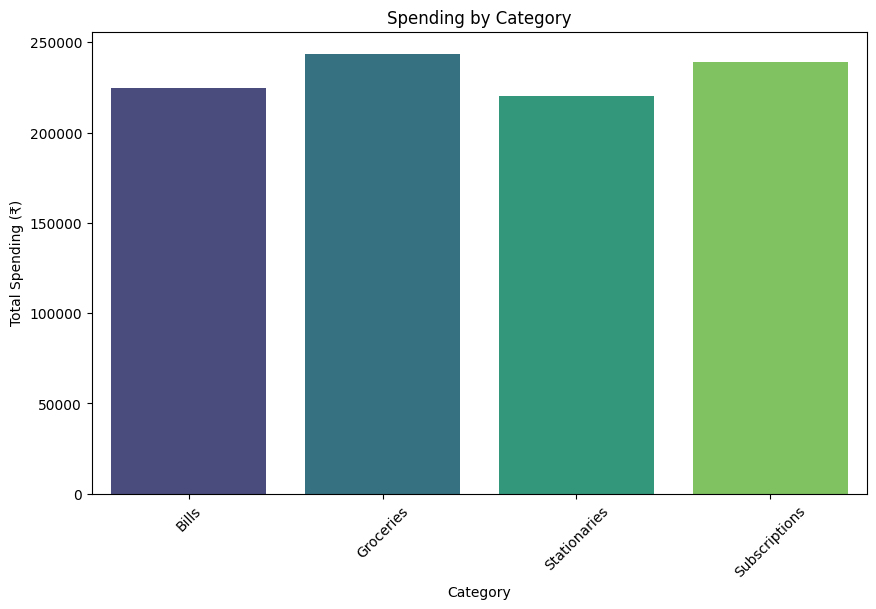

In [5]:
# Bar plot for spending by category
plt.figure(figsize=(10, 6))
sns.barplot(x=spending_by_category.index, y=spending_by_category.values, palette="viridis")
plt.title("Spending by Category")
plt.xlabel("Category")
plt.ylabel("Total Spending (₹)")
plt.xticks(rotation=45)
plt.show()

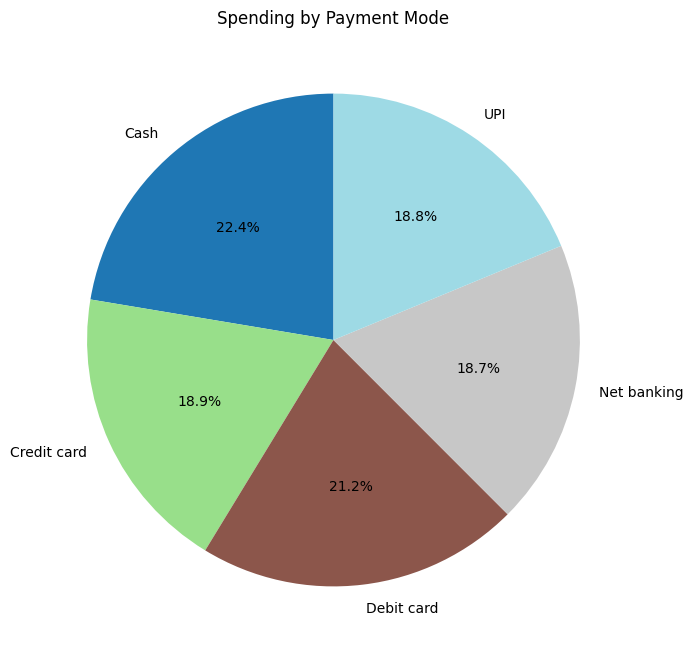

In [6]:
# Pie chart for spending by payment mode
plt.figure(figsize=(8, 8))
spending_by_payment.plot(kind="pie", autopct="%.1f%%", startangle=90, cmap="tab20")
plt.title("Spending by Payment Mode")
plt.ylabel("")  # Remove default y-axis label
plt.show()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1800 entries, 78 to 140
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1800 non-null   datetime64[ns]
 1   Name          1800 non-null   object        
 2   Category      1800 non-null   object        
 3   Payment_Mode  1800 non-null   object        
 4   Description   1800 non-null   object        
 5   Amount        1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 98.4+ KB
None

Missing Values:
 Date            0
Name            0
Category        0
Payment_Mode    0
Description     0
Amount          0
dtype: int64

Statistical Summary:
                        Date  Name   Category Payment_Mode Description  \
count                  1800  1800       1800         1800        1800   
unique                  NaN     4          4            5          16   
top                     NaN

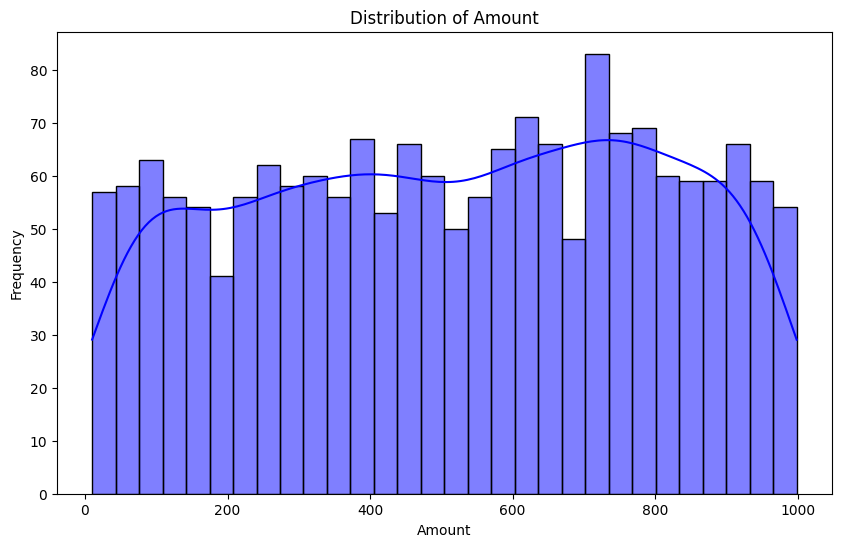

C:\Users\HP\AppData\Local\Temp\ipykernel_2616\423168184.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Amount', data=df, palette="Set3")


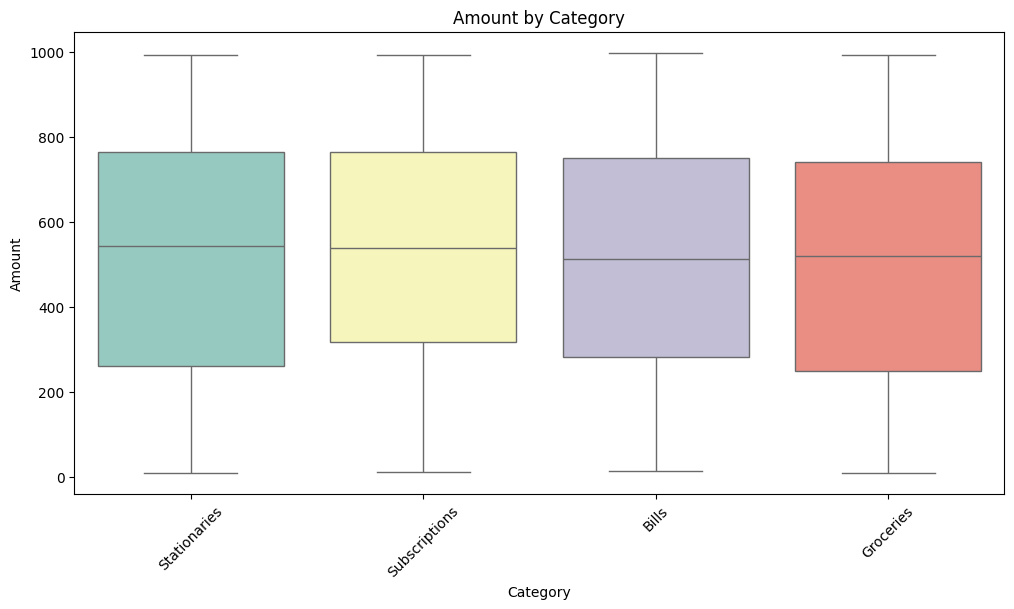

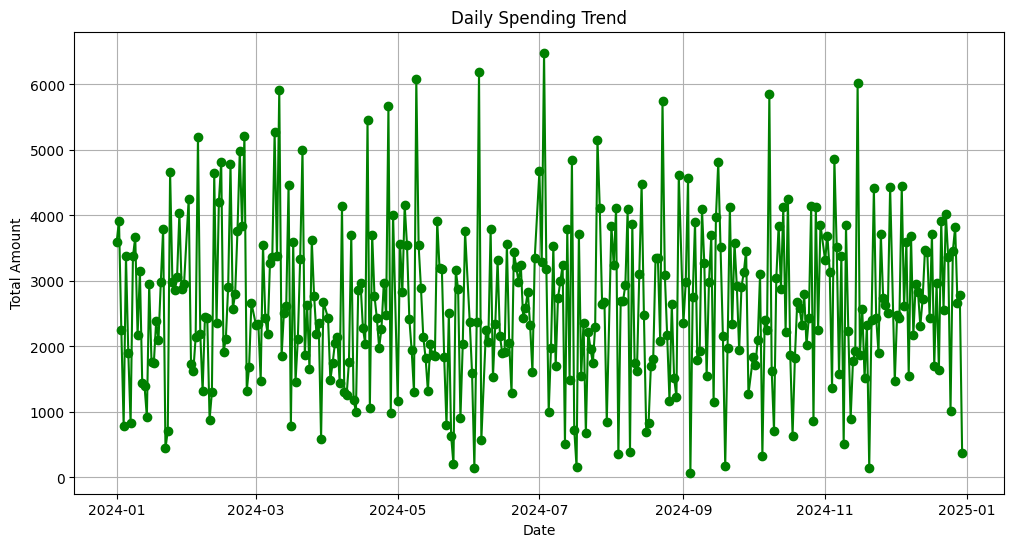

C:\Users\HP\AppData\Local\Temp\ipykernel_2616\423168184.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Amount', data=monthly_spending, palette="viridis")


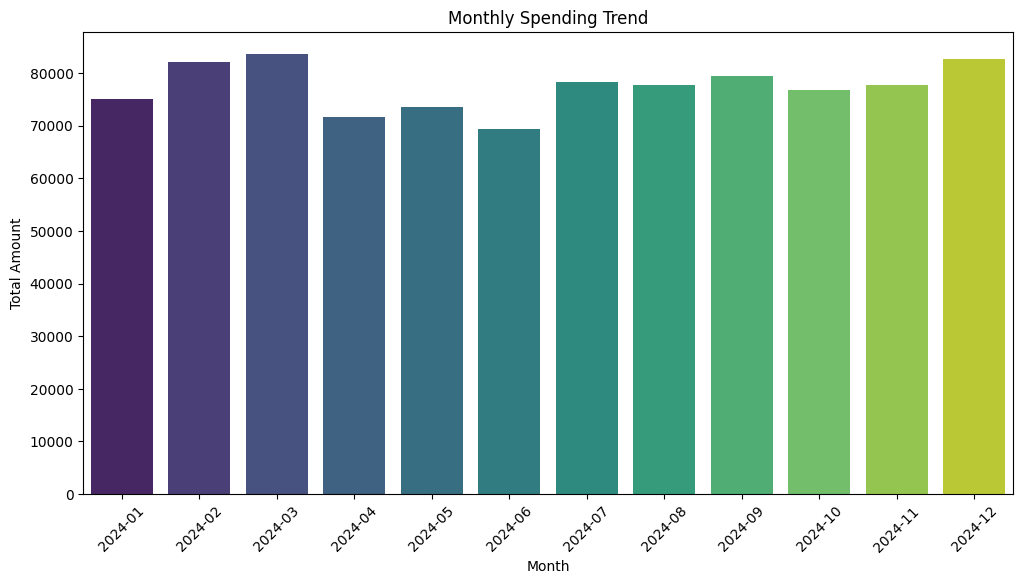

C:\Users\HP\AppData\Local\Temp\ipykernel_2616\423168184.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_spending, x='Amount', y='Category', palette="Blues_r")


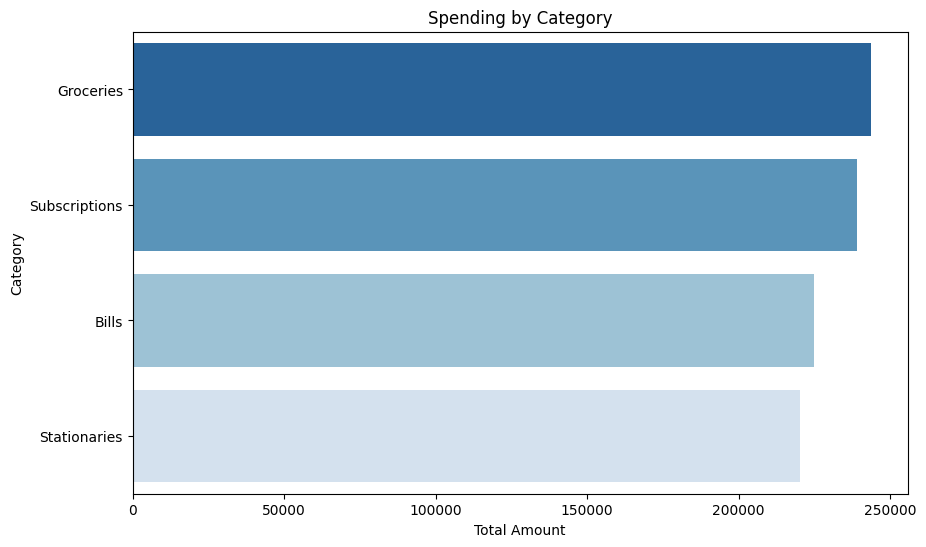

C:\Users\HP\AppData\Local\Temp\ipykernel_2616\423168184.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=payment_mode_spending, x='Amount', y='Payment_Mode', palette="Purples_r")


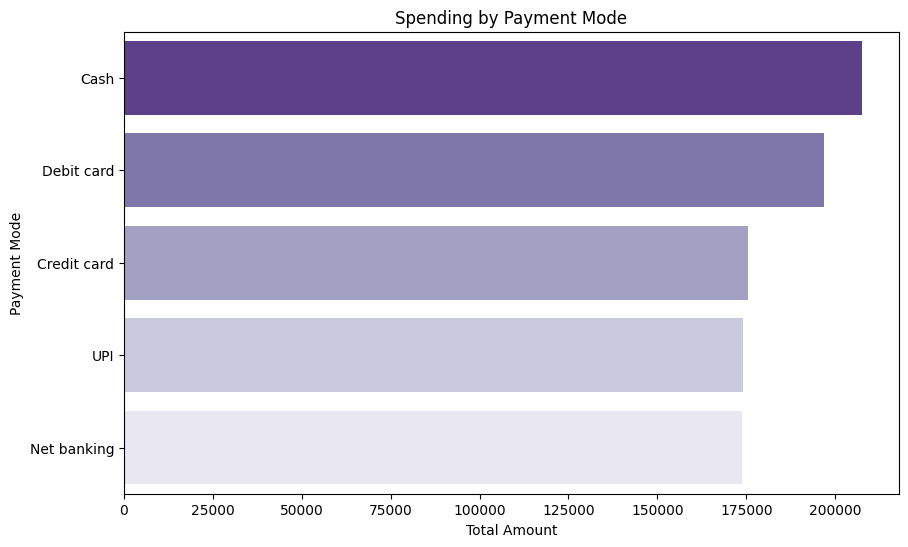

C:\Users\HP\AppData\Local\Temp\ipykernel_2616\423168184.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=name_spending, x='Amount', y='Name', palette="Greens_r")


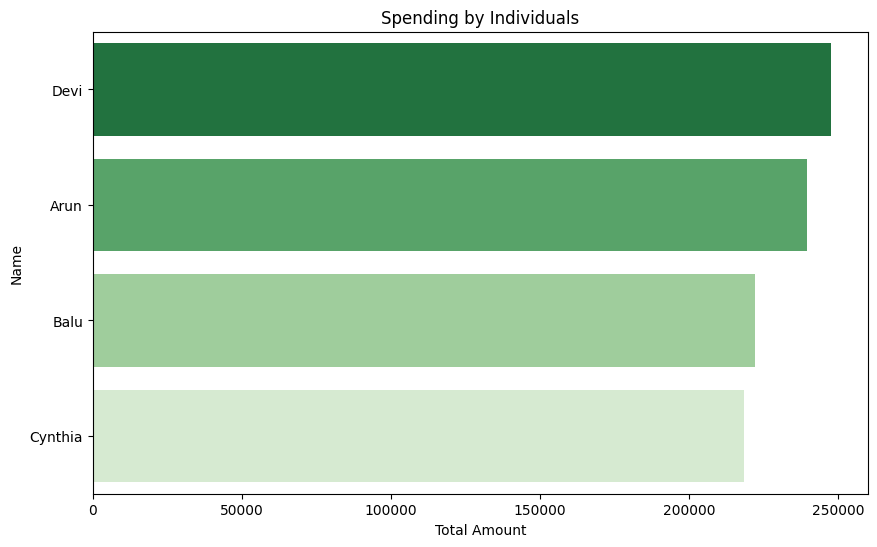

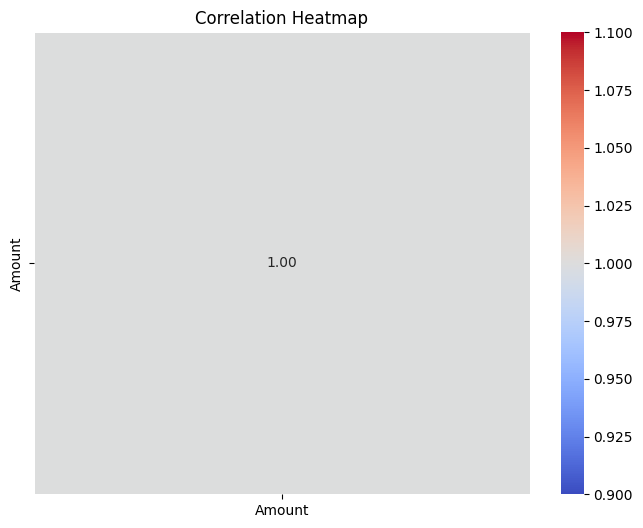

C:\Users\HP\AppData\Local\Temp\ipykernel_2616\423168184.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Amount', palette="Set2")


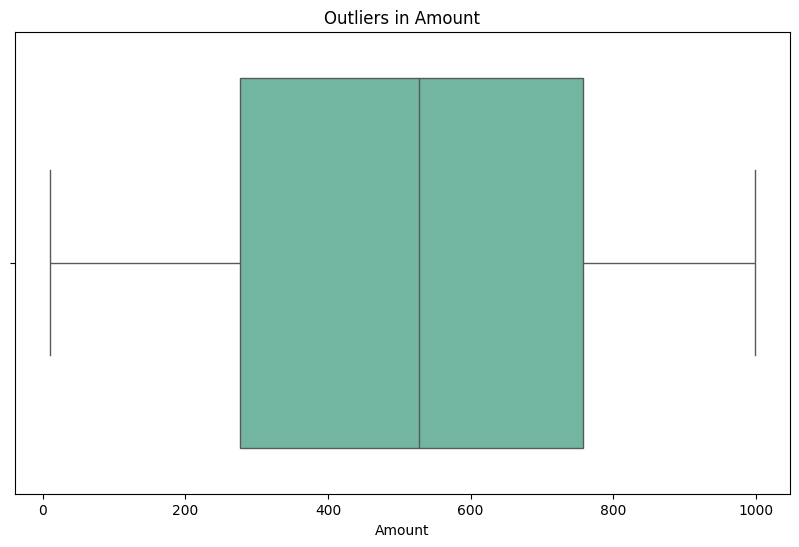

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Ensure the 'Date' column is in datetime format
combined_df['Date'] = pd.to_datetime(combined_df['Date'])

# --------------------------------------------
# 1. Basic Exploration
# --------------------------------------------
def basic_exploration(df):
    print("Dataset Info:")
    print(df.info())  # Overview of dataset
    print("\nMissing Values:\n", df.isnull().sum())  # Check missing values
    print("\nStatistical Summary:\n", df.describe(include='all'))  # Summary of numerical and categorical data
    print("\nSample Data:\n", df.head())  # Display first 5 rows

# Run basic exploration
basic_exploration(combined_df)

# --------------------------------------------
# 2. Distribution Analysis
# --------------------------------------------
def plot_distributions(df):
    # Distribution of Amount
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Amount'], kde=True, bins=30, color='blue')
    plt.title("Distribution of Amount")
    plt.xlabel("Amount")
    plt.ylabel("Frequency")
    plt.show()

    # Boxplot of Amount by Category
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Category', y='Amount', data=df, palette="Set3")
    plt.title("Amount by Category")
    plt.xticks(rotation=45)
    plt.show()

# Run distribution analysis
plot_distributions(combined_df)

# --------------------------------------------
# 3. Spending Trends Over Time
# --------------------------------------------
def plot_spending_trends(df):
    # Daily Spending Trend
    daily_spending = df.groupby('Date')['Amount'].sum().reset_index()
    plt.figure(figsize=(12, 6))
    plt.plot(daily_spending['Date'], daily_spending['Amount'], marker='o', linestyle='-', color='green')
    plt.title("Daily Spending Trend")
    plt.xlabel("Date")
    plt.ylabel("Total Amount")
    plt.grid(True)
    plt.show()

    # Monthly Spending Trend
    df['Month'] = df['Date'].dt.to_period('M')
    monthly_spending = df.groupby('Month')['Amount'].sum().reset_index()
    monthly_spending['Month'] = monthly_spending['Month'].astype(str)
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Month', y='Amount', data=monthly_spending, palette="viridis")
    plt.title("Monthly Spending Trend")
    plt.xticks(rotation=45)
    plt.xlabel("Month")
    plt.ylabel("Total Amount")
    plt.show()

# Run spending trend analysis
plot_spending_trends(combined_df)

# --------------------------------------------
# 4. Spending Analysis by Category and Payment Mode
# --------------------------------------------
def spending_analysis(df):
    # Spending by Category
    category_spending = df.groupby('Category')['Amount'].sum().sort_values(ascending=False).reset_index()
    plt.figure(figsize=(10, 6))
    sns.barplot(data=category_spending, x='Amount', y='Category', palette="Blues_r")
    plt.title("Spending by Category")
    plt.xlabel("Total Amount")
    plt.ylabel("Category")
    plt.show()

    # Spending by Payment Mode
    payment_mode_spending = df.groupby('Payment_Mode')['Amount'].sum().sort_values(ascending=False).reset_index()
    plt.figure(figsize=(10, 6))
    sns.barplot(data=payment_mode_spending, x='Amount', y='Payment_Mode', palette="Purples_r")
    plt.title("Spending by Payment Mode")
    plt.xlabel("Total Amount")
    plt.ylabel("Payment Mode")
    plt.show()

    # Spending by Individuals
    name_spending = df.groupby('Name')['Amount'].sum().sort_values(ascending=False).reset_index()
    plt.figure(figsize=(10, 6))
    sns.barplot(data=name_spending, x='Amount', y='Name', palette="Greens_r")
    plt.title("Spending by Individuals")
    plt.xlabel("Total Amount")
    plt.ylabel("Name")
    plt.show()

# Run spending analysis
spending_analysis(combined_df)

# --------------------------------------------
# 5. Correlation Analysis
# --------------------------------------------
def plot_correlation(df):
    # Correlation Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.show()

# Run correlation analysis
plot_correlation(combined_df)

# --------------------------------------------
# 6. Outlier Detection
# --------------------------------------------
def plot_outliers(df):
    # Boxplot to visualize outliers
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Amount', palette="Set2")
    plt.title("Outliers in Amount")
    plt.xlabel("Amount")
    plt.show()

# Run outlier detection
plot_outliers(combined_df)

# --------------------------------------------
# 7. Interactive Visualizations (Optional)
# --------------------------------------------
def interactive_visualizations(df):
    # Interactive Spending by Category
    fig1 = px.bar(df.groupby('Category')['Amount'].sum().reset_index(), 
                  x='Category', y='Amount', color='Category', 
                  title="Interactive Spending by Category")
    fig1.show()

    # Interactive Pie Chart for Payment Modes
    fig2 = px.pie(df, values='Amount', names='Payment_Mode', title="Spending by Payment Mode")
    fig2.show()

    # Interactive Time Series Plot
    daily_spending = df.groupby('Date')['Amount'].sum().reset_index()
    fig3 = px.line(daily_spending, x='Date', y='Amount', title="Interactive Daily Spending Trend")
    fig3.show()

# Run interactive visualizations
interactive_visualizations(combined_df)